In [1]:
print("Hello world ")

Hello world 


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [20]:
!pwd


/mnt/c/Users/UTSEUS/dataanalysis


# Import of  Lille metropolis Data

In [17]:
mel_cities = gpd.read_file('2024-project/2024-project/cartographic-resources/mel_communes.zip')
dfe = gpd.read_parquet('2024-project/2024-project/cartographic-resources/mel.parquet')


In [13]:
print(type(mel_cities))
print(type(dfe))


<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


Index(['insee', 'nom', 'ut', 'territoire', 'surface', 'perimetre',
       'code_posta', 'geometry'],
      dtype='object')
(97, 8)


<Axes: >

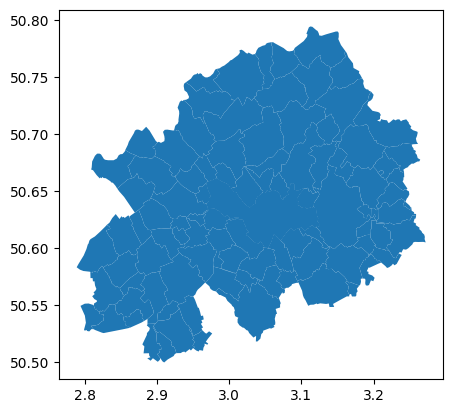

In [79]:
print(mel_cities.columns)
print(mel_cities.shape)
mel_cities.plot()


In [31]:
print(mel_cities[mel_cities['nom'] == 'Lille'])

    insee    nom            ut             territoire       surface  \
82  59350  Lille  LILLE-SECLIN  LILLE-LOMME-HELLEMMES  3.490799e+07   

       perimetre  code_posta  \
82  43602.321304     59000.0   

                                             geometry  
82  POLYGON ((2.97039 50.63971, 2.97269 50.64182, ...  


In [25]:
import os

folder_path = '2024-project/2024-project/cartographic-resources/IRIS-GE_2-0_SHP_LAMB93_D059-2020'

try:
    files = os.listdir(folder_path)
    for file in files:
        print(file)
except FileNotFoundError:
    print(f"The specified folder '{folder_path}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")


IRIS_GE.CPG
IRIS_GE.DBF
IRIS_GE.PRJ
IRIS_GE.SHP
IRIS_GE.SHX
LISTE.csv


In [46]:
nordData = gpd.read_file('2024-project/2024-project/cartographic-resources/IRIS-GE_2-0_SHP_LAMB93_D059-2020/IRIS_GE.SHX')
nordData.columns

print(nordData)

     INSEE_COM              NOM_COM  IRIS  CODE_IRIS                NOM_IRIS  \
0        59433             Nieurlet  0000  594330000                Nieurlet   
1        59273           Gravelines  0101  592730101     Petit Fort Philippe   
2        59436           Noordpeene  0000  594360000              Noordpeene   
3        59350                Lille  0302  593500302        Vauban-Esquermes   
4        59539  Saint-Pierre-Brouck  0000  595390000     Saint-Pierre-Brouck   
...        ...                  ...   ...        ...                     ...   
1341     59392             Maubeuge  0201  593920201        Faubourg de Mons   
1342     59392             Maubeuge  0202  593920202             Pont Allant   
1343     59324              Jeumont  0106  593240106  Quewette et Bersillies   
1344     59324              Jeumont  0105  593240105            Le Lambreçon   
1345     59324              Jeumont  0101  593240101        Zone d'Activités   

     TYP_IRIS                          

In [74]:
lilleMetropolis = nordData[nordData.INSEE_COM.isin(mel_cities['insee']) ]
lilleMetropolis.shape

(517, 7)

<Axes: >

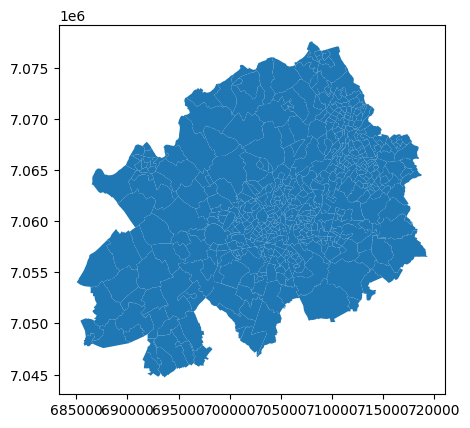

In [48]:
lilleMetropolis.plot()

<Axes: >

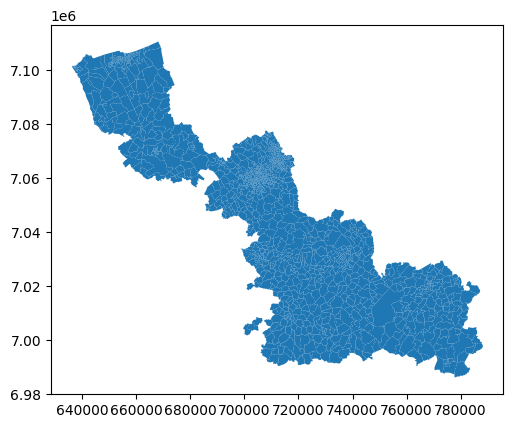

In [42]:
nordData.plot()

# Zones d'activites

In [84]:
scoreDf = lilleMetropolis[['CODE_IRIS', 'geometry']].copy()
print(scoreDf['CODE_IRIS'].duplicated().any())

False


In [88]:
import matplotlib.pyplot as plt

scoreDf['Business_area'] = lilleMetropolis['TYP_IRIS'] == 'A'

print(scoreDf['Business_area'])


3        True
15      False
21      False
29      False
34      False
        ...  
1182    False
1183    False
1184    False
1185    False
1186    False
Name: Business_area, Length: 517, dtype: bool


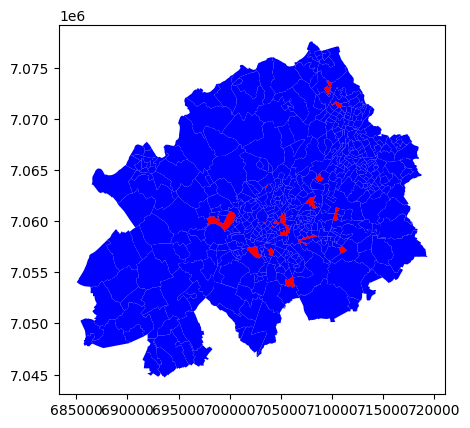

In [89]:
# Plot the complete DataFrame in blue
ax = lilleMetropolis.plot(color='blue')

# Plot the subset DataFrame in red
scoreDf[scoreDf['Business_area'] == True].plot(ax=ax, color='red')

# Show the plot
plt.show()

# Zones d'habitat

3       False
15      False
21       True
29      False
34      False
        ...  
1182     True
1183     True
1184     True
1185     True
1186     True
Name: Residential_area, Length: 517, dtype: bool


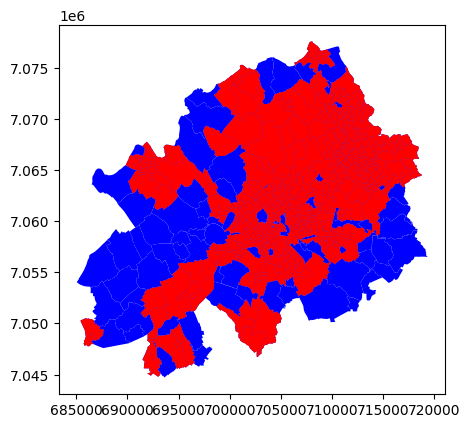

In [91]:
import matplotlib.pyplot as plt

scoreDf['Residential_area'] = lilleMetropolis['TYP_IRIS'] == 'H'

print(scoreDf['Residential_area'])
# Plot the complete DataFrame in blue
ax = lilleMetropolis.plot(color='blue')

# Plot the subset DataFrame in red
scoreDf[scoreDf['Residential_area'] == True].plot(ax=ax, color='red')

# Show the plot
plt.show()